In [23]:
# importing the essential packages

import pandas as pd
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize
from skimage.io import imread
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [24]:
os.listdir('/content/drive/MyDrive/Datasets for ML/Brand/train') # initializing the training set path

['adidas', 'nike']

In [25]:
os.listdir('/content/drive/MyDrive/Datasets for ML/Brand/test') # initializing the testing set path

['adidas', 'nike']

In [26]:
datadir='/content/drive/MyDrive/Datasets for ML/Brand/train' # preparing training data from data available

In [27]:
X_train=[]
y_train=[]
categories=['nike','adidas']
for i in categories:
  path=os.path.join(datadir,i)
  print(path)
  images=os.listdir(path)
  print(i,':',len(images))
  for img in images:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_sized=resize(img_array,(150,150,1))
    X_train.append(img_sized)
    y_train.append(categories.index(i))
print('loaded category',i)

/content/drive/MyDrive/Datasets for ML/Brand/train/nike
nike : 230
/content/drive/MyDrive/Datasets for ML/Brand/train/adidas
adidas : 230
loaded category adidas


In [28]:
datadir='/content/drive/MyDrive/Datasets for ML/Brand/test' # preparing testing data from loaded data
X_test=[]
y_test=[]
categories=['nike','adidas']
for i in categories:
  path=os.path.join(datadir,i)
  print(path)
  images=os.listdir(path)
  print(i,':',len(images))
  for img in images:
    img_path=os.path.join(path,img)
    img_array=imread(img_path)
    img_sized=resize(img_array,(150,150,1))
    X_test.append(img_sized)
    y_test.append(categories.index(i))
print('loaded category',i)

/content/drive/MyDrive/Datasets for ML/Brand/test/nike
nike : 30
/content/drive/MyDrive/Datasets for ML/Brand/test/adidas
adidas : 30
loaded category adidas


In [29]:
print(len(X_train))
print(len(y_train))

460
460


In [30]:
print(len(X_test))
print(len(y_test))

60
60


In [31]:
import numpy as np # convertion of data into array for processing
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

In [32]:
X_train.shape

(460, 150, 150, 1)

In [33]:
y_train.shape

(460,)

In [34]:
model=Sequential() # creating the cnn model
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(10,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [35]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy']) # compiling the model and evaulation of the model

In [36]:
model.fit(X_train,y_train,batch_size=100,epochs=10) # model training using the training data set

Epoch 1/10
5/5 [==============================] - 3s 27ms/step - loss: 2.2825 - accuracy: 0.4891
Epoch 2/10
5/5 [==============================] - 0s 25ms/step - loss: 1.0642 - accuracy: 0.5283
Epoch 3/10
5/5 [==============================] - 0s 24ms/step - loss: 0.7079 - accuracy: 0.5978
Epoch 4/10
5/5 [==============================] - 0s 24ms/step - loss: 0.7464 - accuracy: 0.5870
Epoch 5/10
5/5 [==============================] - 0s 33ms/step - loss: 0.5876 - accuracy: 0.6543
Epoch 6/10
5/5 [==============================] - 0s 35ms/step - loss: 0.5058 - accuracy: 0.7587
Epoch 7/10
5/5 [==============================] - 0s 32ms/step - loss: 0.4531 - accuracy: 0.7826
Epoch 8/10
5/5 [==============================] - 0s 24ms/step - loss: 0.4015 - accuracy: 0.8457
Epoch 9/10
5/5 [==============================] - 0s 23ms/step - loss: 0.3601 - accuracy: 0.8761
Epoch 10/10
5/5 [==============================] - 0s 23ms/step - loss: 0.3094 - accuracy: 0.9196


In [37]:
loss,accu=model.evaluate(X_test,y_test)
print('loss',loss)
print('accuracy',accu) # performing evaluation

2/2 [==============================] - 0s 13ms/step - loss: 0.6519 - accuracy: 0.6667
loss 0.6518794894218445
accuracy 0.6666666865348816


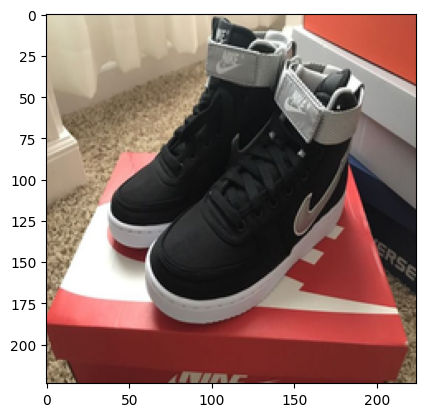

In [43]:
brand=imread('/content/drive/MyDrive/Datasets for ML/Brand/test/nike/Image_200.jpg')
plt.imshow(brand)

In [44]:
brand=resize(brand,(150,150,1)) # preprocessing the new data to predict the class label
brand_array=np.array(brand)
brand_array=brand.reshape(1,150,150,1)
brand_array.shape

(1, 150, 150, 1)

In [45]:
pred=model.predict(brand_array)
pred

1/1 [==============================] - 0s 37ms/step


array([[0.5648717 , 0.43512833]], dtype=float32)

In [46]:
ind=pred.argmax()
print(ind)

0


In [47]:
print(categories[ind])

nike
